## CONVERSION RATE CHALLENGE - PART 1b - EDA

In [26]:
# Import librairies needed
import pandas as pd

import matplotlib.pyplot as plt

In [27]:
# Load the dataset
dataset = pd.read_csv("conversion_data_train.csv")

In [28]:
# Visualaze the first 5 rows of the dataset
dataset.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [29]:
# Get some statistic figures of the dataset
dataset.describe(include = "all")

,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [30]:
# Check variable type and missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


In [31]:
# Tranform the type of the "new_user" column into object type by replace 0 and 1 by "No" or "Yes"
dataset["new_user"] = dataset["new_user"].apply(lambda x : "Yes" if x == 1 else "No")

In [32]:
# Check the change
dataset.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,Yes,Direct,2,0
1,UK,21,Yes,Ads,3,0
2,Germany,20,No,Seo,14,1
3,US,23,Yes,Seo,3,0
4,US,28,Yes,Direct,3,0


In [33]:
# Scale the "age" columns to "scaled age"
dataset['age_scaled'] = dataset['age'].apply(lambda x : '15-19 yo' if x >= 0 and x < 20
                                                else '20-29' if (x >= 20) and (x < 30)
                                                else '30-39' if (x >= 30) and (x < 40)
                                                else '40-49' if (x >= 40) and (x < 50)
                                                else '50-59' if (x >= 50) and (x < 60)
                                                else '60 et +')

# Drop the useless used column "age"
dataset = dataset.drop(
    ["age"],
    axis=1)

In [34]:
# Check the change
dataset.head()

,country,new_user,source,total_pages_visited,converted,age_scaled
0,China,Yes,Direct,2,0,20-29
1,UK,Yes,Ads,3,0,20-29
2,Germany,No,Seo,14,1,20-29
3,US,Yes,Seo,3,0,20-29
4,US,Yes,Direct,3,0,20-29


In [35]:
# Get the column names of the dataset
dataset.columns.tolist()

['country',
 'new_user',
 'source',
 'total_pages_visited',
 'converted',
 'age_scaled']

In [36]:
# Reorder columns of the dataset to have the target at the end of it
dataset = dataset[['country', 
                    'new_user', 
                    'source', 
                    'total_pages_visited', 
                    'age_scaled',
                    'converted']]

In [37]:
# Create a dataset with only the converted people                                       
mask_converted = dataset["converted"] == 1
data_converted = dataset.loc[mask_converted,:]

In [38]:
# Get the unique value of all variables
country_yes = data_converted["country"].unique().tolist()
new_user_yes = data_converted["new_user"].unique().tolist()
age_yes = data_converted["age_scaled"].unique().tolist()
source_yes = data_converted["source"].unique().tolist()
total_pages_visited_yes = data_converted["total_pages_visited"].unique().tolist()

## NOTE_ : Find an other way more simple to do this action

In [39]:
# Get the counts of each values of columns
country_yes_number = data_converted["country"].value_counts().tolist()
new_user_yes_number = data_converted["new_user"].value_counts().tolist()
age_yes_number = data_converted["age_scaled"].value_counts().tolist()
source_yes_number = data_converted["source"].value_counts().tolist()
total_pages_visited_yes_number = data_converted["total_pages_visited"].value_counts().tolist()

## NOTE_ : Find an other way more simple to do this action

In [40]:
# Create a dataset with only the not converted people
mask_not_converted = dataset["converted"] == 0
data_not_converted = dataset.loc[mask_not_converted, :]

## NOTE_ : Find an other way more simple to do this action

In [41]:
# Get the unique value of all variables
country_no = data_not_converted["country"].unique().tolist()
new_user_no = data_not_converted["new_user"].unique().tolist()
age_no = data_not_converted["age_scaled"].unique().tolist()
source_no = data_not_converted["source"].unique().tolist()
total_pages_visited_no = data_not_converted["total_pages_visited"].unique().tolist()

## NOTE_ : Find an other way more simple to do this action

In [42]:
# Get the counts of each values of columns
country_no_number = data_not_converted["country"].value_counts().tolist()
new_user_no_number = data_not_converted["new_user"].value_counts().tolist()
age_no_number = data_not_converted["age_scaled"].value_counts().tolist()
source_no_number = data_not_converted["source"].value_counts().tolist()
total_pages_visited_no_number = data_not_converted["total_pages_visited"].value_counts().tolist()

## NOTE_ : Find an other way more simple to do this action

# Data visualization 

NOTE_ : if more time : add the number and give a pourcentage view

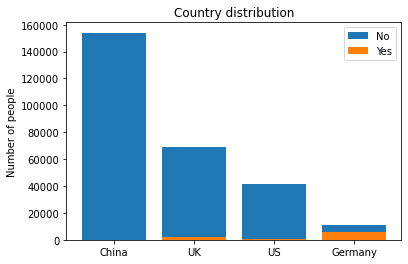

In [43]:
# Visualize the 'country' distribution of 'Yes' and 'No' converted people
fig, ax = plt.subplots()

ax.bar(x=country_no, height = country_no_number, label='No')
ax.bar(x=country_yes, height = country_yes_number, label='Yes')

ax.set_ylabel('Number of people')
ax.set_title('Country distribution')
ax.legend()

plt.show()

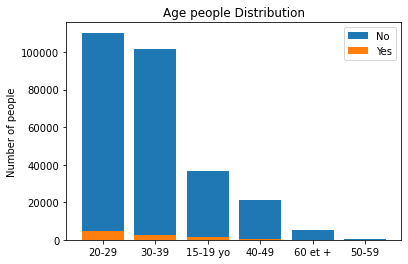

In [44]:
# Visualize the 'age_scaled' distribution of 'Yes' and 'No' converted people

fig, ax = plt.subplots()        

x_labels = dataset["age_scaled"].unique().tolist()
ax.bar(x=x_labels, height = age_no_number, label='No')
ax.bar(x=x_labels, height = age_yes_number, label='Yes')

ax.set_ylabel('Number of people')
ax.set_title('Age people Distribution')
ax.legend()

plt.show()

## NOTE_ : IF TIME, ORDER THE 'age_scaled'

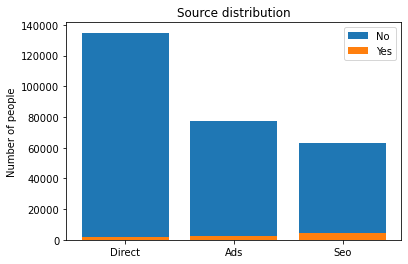

In [45]:
# Visualize the 'source' distribution of 'Yes' and 'No' converted people
fig, ax = plt.subplots()         

ax.bar(x=source_no, height = source_no_number, label='No')
ax.bar(x=source_yes, height = source_yes_number, label='Yes')

ax.set_ylabel('Number of people')
ax.set_title('Source distribution')
ax.legend()

plt.show()

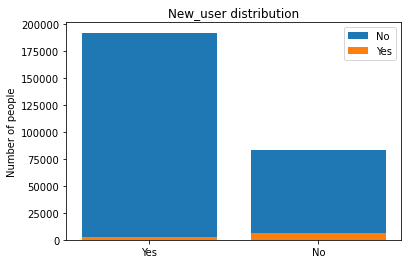

In [46]:
# Visualize the 'new_user' distribution of 'Yes' and 'No' converted people
fig, ax = plt.subplots()         

ax.bar(x=new_user_no, height = new_user_no_number, label='No')
ax.bar(x=new_user_yes, height = new_user_yes_number, label='Yes')

ax.set_ylabel('Number of people')
ax.set_title('New_user distribution')
ax.legend()

plt.show()

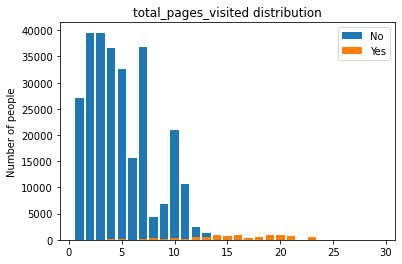

In [47]:
# Visualize the 'total_pages_visited' distribution of 'Yes' and 'No' converted people
fig, ax = plt.subplots()

ax.bar(x=total_pages_visited_no, height = total_pages_visited_no_number, label='No')
ax.bar(x=total_pages_visited_yes, height = total_pages_visited_yes_number, label='Yes')

ax.set_ylabel('Number of people')
ax.set_title('total_pages_visited distribution')
ax.legend()

plt.show()

In [48]:
dataset.head()

,country,new_user,source,total_pages_visited,age_scaled,converted
0,China,Yes,Direct,2,20-29,0
1,UK,Yes,Ads,3,20-29,0
2,Germany,No,Seo,14,20-29,1
3,US,Yes,Seo,3,20-29,0
4,US,Yes,Direct,3,20-29,0


In [49]:
# Rename the dataset
dataset_conversion_rate = dataset

# Saving the clean dataset for the next step
dataset_conversion_rate.to_csv(r'src/dataset_conversion_rate_train.csv', index=False)

PART 1b : END